##import library

In [39]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

# Scikit-learn utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import joblib

##Get Dataset

In [2]:
df = pd.read_csv('data-final.csv', delimiter='\t')

##Cleaning and selected Dataset


In [3]:
df.drop(df.columns[50:], axis=1, inplace=True)

In [4]:
df.drop_duplicates(inplace=True)
df.dropna(axis=0, how='any', inplace=True)

##Data Information

In [5]:
df.describe(include='all')

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,...,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06,1.008786e+06
mean,2.652471e+00,2.779167e+00,3.296210e+00,3.148363e+00,3.284682e+00,2.405548e+00,2.777389e+00,3.423722e+00,2.970390e+00,3.565924e+00,...,3.664151e+00,2.078861e+00,4.011187e+00,2.002415e+00,3.803242e+00,1.896757e+00,3.987420e+00,3.190272e+00,4.134585e+00,3.969365e+00
std,1.258897e+00,1.318125e+00,1.205135e+00,1.228714e+00,1.268462e+00,1.220572e+00,1.395087e+00,1.261760e+00,1.339349e+00,1.294468e+00,...,1.143767e+00,1.107473e+00,1.079427e+00,1.085010e+00,9.742203e-01,1.099323e+00,9.890028e-01,1.246604e+00,1.020795e+00,1.015893e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,5.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [6]:
df.isnull().sum()

EXT1     0
EXT2     0
EXT3     0
EXT4     0
EXT5     0
EXT6     0
EXT7     0
EXT8     0
EXT9     0
EXT10    0
EST1     0
EST2     0
EST3     0
EST4     0
EST5     0
EST6     0
EST7     0
EST8     0
EST9     0
EST10    0
AGR1     0
AGR2     0
AGR3     0
AGR4     0
AGR5     0
AGR6     0
AGR7     0
AGR8     0
AGR9     0
AGR10    0
CSN1     0
CSN2     0
CSN3     0
CSN4     0
CSN5     0
CSN6     0
CSN7     0
CSN8     0
CSN9     0
CSN10    0
OPN1     0
OPN2     0
OPN3     0
OPN4     0
OPN5     0
OPN6     0
OPN7     0
OPN8     0
OPN9     0
OPN10    0
dtype: int64

In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    #print(f"Kolom {column} memiliki nilai unik: {unique_values}")

In [8]:
all_unique_values = np.unique(df.values)
print(f"Semua nilai unik di Data: {all_unique_values}")

Semua nilai unik di Data: [0. 1. 2. 3. 4. 5.]


In [9]:
#Menganti Nilai 0 dengan Nilai yang sering muncul

df = df.replace(0, np.nan)
df = df.apply(lambda column: column.fillna(column.mode()[0]))

In [10]:
new_value = np.unique(df.values)
print(new_value)

[1. 2. 3. 4. 5.]


##Mengambil 100.000 dataset

In [11]:
df = df[:100000]
df.shape

(100000, 50)

##Formula for big five score calculation
###n = nilai dari feature
1. EXT = 20 + n0 - n1 + n2 - n3 + n4 - n5 + n6 - n7 + n8 - n9
2. EST = 38 - n10 + n11 − n12 + n13 − n14 − n15 − n16 −n17 − n18 − n19
3. AGR = 14 - n20 + n21 - n22 + n23 - n24 + n25 - n26 + n27 +n28 + n29
4. CSN = 14 + n30 - n31 + n32 - n33 + n34 - n35 + n36 - n37 + n38 + n39
5. OPN = 8 + n40 - n41 + n42 - n43 + n44 - n45 + n46 + n47 +48 + n49


##Add target feature column EXT

In [12]:
columns_ext = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

result_ext= []

for index, row in df.iterrows():
    result = 20
    for i, col in enumerate(columns_ext):
        if i % 2 == 0:
            result += row.iloc[col]
        else:
            result -= row.iloc[col]
    result_ext.append(result)

result_ext = np.array(result_ext)
result_ext[result_ext == 0] = 1

print(result_ext)

[36. 10. 15. ...  4. 19. 22.]


##Add Feature column EST

In [13]:
columns_est = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

result_est= []

for index, row in df.iterrows():
    result = 38
    for col in columns_est:
        if col == 11 or col == 13:
            result += row.iloc[col]
        else:
            result -= row.iloc[col]
    result_est.append(result)

result_est = np.array(result_est)
result_est[result_est == 0] = 1

print(result_est)

[26. 25. 24. ...  1. 25. 21.]


##Add Feature AGR


In [14]:
columns_agr = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

result_agr= []

for index, row in df.iterrows():
    result = 14
    for col in columns_agr:
        if col in [20, 22, 24, 26]:
            result -= row.iloc[col]
        else:
            result += row.iloc[col]
    result_agr.append(result)

result_agr = np.array(result_agr)
result_agr[result_agr == 0] = 1


print(result_agr)

[29. 34. 32. ... 28. 29. 37.]


##Add Feature CSN

In [15]:
columns_csn = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

result_csn= []

for index, row in df.iterrows():
    result = 14
    for col in columns_csn:
        if col in [31, 33, 35, 37]:
            result -= row.iloc[col]
        else:
            result += row.iloc[col]
    result_csn.append(result)

result_csn = np.array(result_csn)
result_csn[result_csn == 0] = 1

print(result_csn)

[22. 27. 24. ... 28. 23. 32.]


##Add Feature OPN

In [16]:
columns_opn = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

result_opn= []

for index, row in df.iterrows():
    result = 8
    for col in columns_opn:
        if col in [41, 43, 45]:
            result -= row.iloc[col]
        else:
            result += row.iloc[col]
    result_opn.append(result)

result_opn = np.array(result_opn)
result_opn[result_opn == 0] = 1

print(result_opn)

[35. 25. 31. ... 29. 40. 27.]


In [17]:
unique_ext = np.unique(result_ext)
print(unique_ext)

unique_est = np.unique(result_est)
print(unique_est)

unique_agr = np.unique(result_agr)
print(unique_agr)

unique_csn = np.unique(result_csn)
print(unique_csn)

unique_opn = np.unique(result_opn)
print(unique_opn)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]


##Konversi Result ke Persen dan memisahkan data training dan data testing

In [18]:
x_input = df.iloc[:,0 : 50]
print(x_input)

        EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0        4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1        3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2        2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3        2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4        3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
100415   2.0   3.0   4.0   4.0   3.0   1.0   3.0   4.0   3.0    3.0  ...   
100416   4.0   2.0   5.0   3.0   3.0   1.0   3.0   5.0   1.0    3.0  ...   
100417   1.0   5.0   2.0   4.0   2.0   4.0   1.0   5.0   1.0    5.0  ...   
100418   3.0   3.0   4.0   3.0   3.0   2.0   4.0   5.0   2.0    4.0  ...   
100419   3.0   3.0   3.0   3.0   4.0   3.0   3.0   3.0   3.0    2.0  ...   

        OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0        5.0   1.

In [19]:
y_ext = np.array((result_ext*2.5/100), dtype=float)
y_ext = np.round(y_ext, decimals=2)

y_est = np.array((result_est*2.5/100), dtype=float)
y_est = np.round(y_est, decimals=2)

y_agr = np.array((result_agr*2.5/100), dtype=float)
y_agr = np.round(y_agr, decimals=2)

y_csn = np.array((result_csn*2.5/100), dtype=float)
y_csn = np.round(y_csn, decimals=2)

y_opn = np.array((result_opn*2.5/100), dtype=float)
y_opn = np.round(y_opn, decimals=2)

In [20]:
print(np.unique(y_ext))

[0.02 0.05 0.08 0.1  0.12 0.15 0.18 0.2  0.22 0.25 0.28 0.3  0.32 0.35
 0.38 0.4  0.42 0.45 0.48 0.5  0.52 0.55 0.57 0.6  0.62 0.65 0.68 0.7
 0.72 0.75 0.78 0.8  0.82 0.85 0.88 0.9  0.92 0.95 0.98 1.  ]


In [21]:
df['y_EXT'] = y_ext
df['y_EST'] = y_est
df['y_AGR'] = y_agr
df['y_CSN'] = y_csn
df['y_OPN'] = y_opn
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN6,OPN7,OPN8,OPN9,OPN10,y_EXT,y_EST,y_AGR,y_CSN,y_OPN
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,5.0,3.0,4.0,5.0,0.90,0.65,0.72,0.55,0.88
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,4.0,2.0,5.0,3.0,0.25,0.62,0.85,0.68,0.62
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2.0,5.0,3.0,4.0,4.0,0.38,0.60,0.80,0.60,0.78
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1.0,4.0,4.0,3.0,3.0,0.40,0.52,0.70,0.38,0.72
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,3.0,5.0,5.0,0.48,0.78,0.90,0.95,0.95


In [ ]:
# Save right dataset
df.to_csv('dataCleanBFP.csv', index=False)

In [22]:
y_output = np.array([y_ext, y_est, y_agr, y_csn, y_opn])
y_output = y_output.T
print("Shape of X:", x_input.shape)
print("Shape of y:", y_output.shape)

Shape of X: (100000, 50)
Shape of y: (100000, 5)


In [23]:
# Split data menjadi training+validation dan test set
X_train, X_test, y_train, y_test = train_test_split(x_input, y_output, test_size=0.15, random_state=42)

# Split training+validation menjadi training dan validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (68000, 50) (68000, 5)
Validation set: (17000, 50) (17000, 5)
Test set: (15000, 50) (15000, 5)


In [24]:
# Scaling input
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Scaling output
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

##Save Scaler

In [41]:
joblib.dump(scaler_X, 'scaler_x.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

##Membuat model

In [25]:
def build_custom_model():
    model = Sequential()

    model.add(Dense(416, activation='relu', input_shape=(50,))) 
    model.add(Dropout(0.2))

    model.add(Dense(96, activation='relu')) 
    model.add(Dropout(0.2))  

    model.add(Dense(256, activation='relu')) 
    model.add(Dropout(0.4)) 

    model.add(Dense(384, activation='relu'))
    model.add(Dropout(0.1)) 

    model.add(Dense(224, activation='relu'))
    model.add(Dropout(0.4)) 

    model.add(Dense(288, activation='relu')) 
    model.add(Dropout(0.3)) 

    model.add(Dense(5, activation='sigmoid')) 

    learning_rate = 0.00025095748994520946
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'RootMeanSquaredError'])

    return model

In [26]:
model = build_custom_model()
model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 416)            │        21,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 416)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        40,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 384)            │        98,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 224)            │        86,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 288)            │        64,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │         1,445 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337,253 (1.29 MB)

 Trainable params: 337,253 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(
    X_train_scaled, y_train_scaled, 
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=50, 
    batch_size=32,
    verbose=1
)

Epoch 1/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - RootMeanSquaredError: 0.1204 - loss: 0.0153 - mae: 0.0918 - val_RootMeanSquaredError: 0.0367 - val_loss: 0.0013 - val_mae: 0.0288
Epoch 2/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 0.0686 - loss: 0.0047 - mae: 0.0532 - val_RootMeanSquaredError: 0.0331 - val_loss: 0.0011 - val_mae: 0.0258
Epoch 3/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 0.0628 - loss: 0.0039 - mae: 0.0486 - val_RootMeanSquaredError: 0.0310 - val_loss: 9.5919e-04 - val_mae: 0.0241
Epoch 4/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 0.0590 - loss: 0.0035 - mae: 0.0456 - val_RootMeanSquaredError: 0.0302 - val_loss: 9.1419e-04 - val_mae: 0.0237
Epoch 5/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 0.0562 - loss: 0.0032 - mae: 0.0435 - val_RootMeanSquaredError: 0.0269 - val_loss: 7.2182e-04 - val_mae: 0.0208
Epoch 6/50
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Ro

In [28]:
test_loss, test_mae, test_rmse = model.evaluate(X_test_scaled, y_test_scaled)
print(f"Test Loss: {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")
print(f"Test RMSE: {test_rmse:.6f}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - RootMeanSquaredError: 0.0242 - loss: 5.8441e-04 - mae: 0.0184
Test Loss: 0.000581
Test MAE: 0.018374
Test RMSE: 0.024094


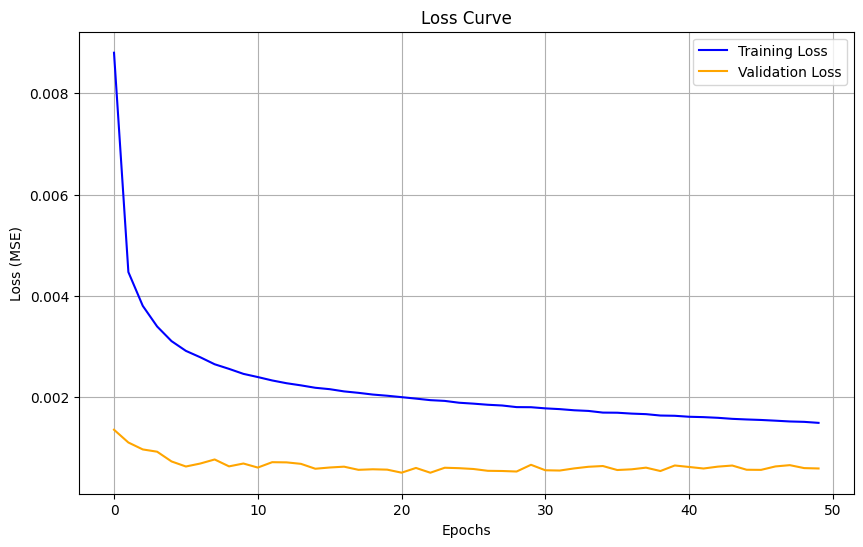

In [29]:
def plot_loss_curve(history):
    plt.figure(figsize=(10, 6))
    
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title('Loss Curve')
    plt.legend()
    plt.grid(True)
    
    plt.show()

plot_loss_curve(history)


##Model prediksi dan validasi

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step

Prediction Validation:
--------------------------------------------------
y_EXT:
  R2 Score: 0.9860
  RMSE: 0.0268
  MAE: 0.0216
  True Mean: 0.4902, Predicted Mean: 0.4835, Difference: 0.0067
  True Std: 0.2264, Predicted Std: 0.2065, Difference: 0.0199
--------------------------------------------------


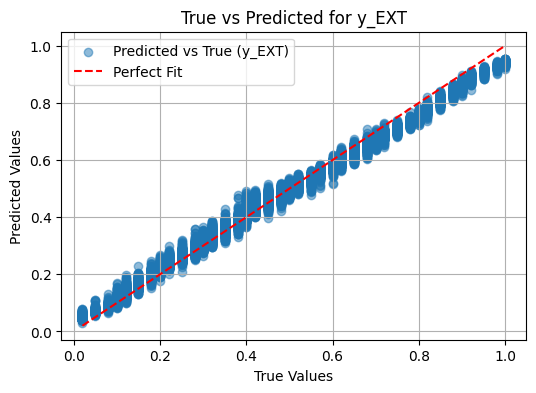

y_EST:
  R2 Score: 0.9842
  RMSE: 0.0262
  MAE: 0.0205
  True Mean: 0.4825, Predicted Mean: 0.4728, Difference: 0.0097
  True Std: 0.2083, Predicted Std: 0.1894, Difference: 0.0189
--------------------------------------------------


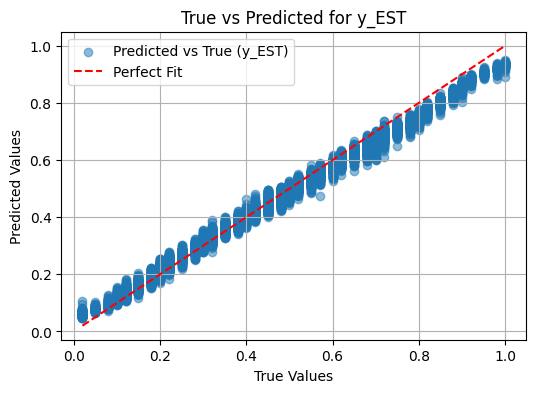

y_AGR:
  R2 Score: 0.9835
  RMSE: 0.0231
  MAE: 0.0165
  True Mean: 0.6886, Predicted Mean: 0.6947, Difference: 0.0061
  True Std: 0.1802, Predicted Std: 0.1637, Difference: 0.0165
--------------------------------------------------


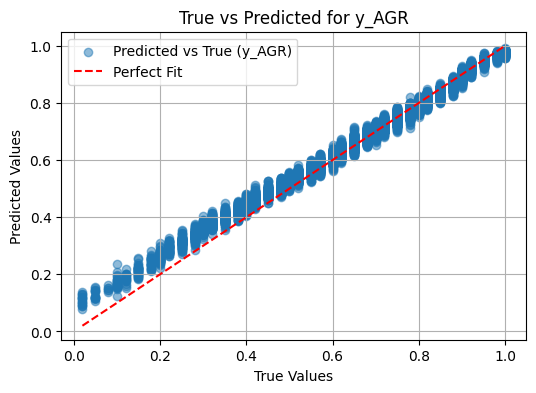

y_CSN:
  R2 Score: 0.9834
  RMSE: 0.0234
  MAE: 0.0182
  True Mean: 0.5760, Predicted Mean: 0.5870, Difference: 0.0110
  True Std: 0.1815, Predicted Std: 0.1668, Difference: 0.0146
--------------------------------------------------


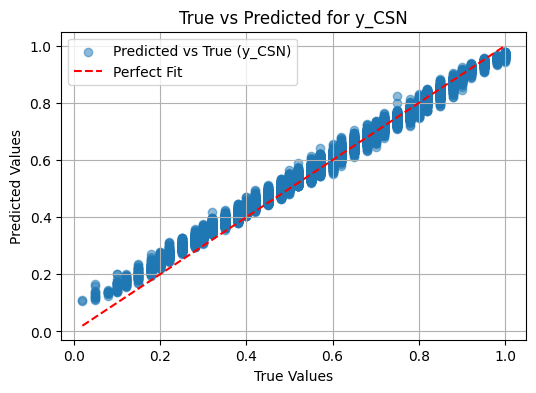

y_OPN:
  R2 Score: 0.9869
  RMSE: 0.0174
  MAE: 0.0132
  True Mean: 0.7126, Predicted Mean: 0.7090, Difference: 0.0035
  True Std: 0.1518, Predicted Std: 0.1450, Difference: 0.0068
--------------------------------------------------


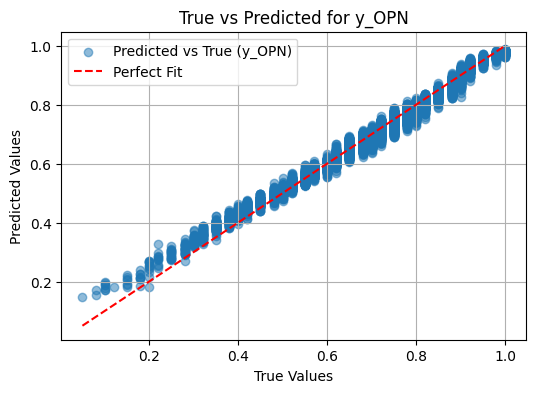


Overall Metrics:
--------------------------------------------------
  Average R2 Score: 0.9848
  Average RMSE: 0.0234
  Average MAE: 0.0180
--------------------------------------------------


In [30]:
def predict_and_validate(model, X_test, y_test):
  
    predictions_scaled = model.predict(X_test)
    
    y_test = np.array(scaler_y.inverse_transform(y_test))
    predictions = np.array(scaler_y.inverse_transform(predictions_scaled))

    output_names = ['y_EXT', 'y_EST', 'y_AGR', 'y_CSN', 'y_OPN']

    print("\nPrediction Validation:")
    print("-" * 50)

    r2_scores = []
    rmses = []
    maes = []

    for i, name in enumerate(output_names):
    
        r2 = r2_score(y_test[:, i], predictions[:, i])
        rmse = np.sqrt(mean_squared_error(y_test[:, i], predictions[:, i]))
        mae = mean_absolute_error(y_test[:, i], predictions[:, i])

        true_mean = np.mean(y_test[:, i])
        pred_mean = np.mean(predictions[:, i])
        true_std = np.std(y_test[:, i])
        pred_std = np.std(predictions[:, i])

        r2_scores.append(r2)
        rmses.append(rmse)
        maes.append(mae)

        print(f"{name}:")
        print(f"  R2 Score: {r2:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  True Mean: {true_mean:.4f}, Predicted Mean: {pred_mean:.4f}, Difference: {abs(true_mean - pred_mean):.4f}")
        print(f"  True Std: {true_std:.4f}, Predicted Std: {pred_std:.4f}, Difference: {abs(true_std - pred_std):.4f}")
        print("-" * 50)

        plt.figure(figsize=(6, 4))
        plt.scatter(y_test[:, i], predictions[:, i], alpha=0.5, label=f"Predicted vs True ({name})")
        plt.plot(
            [min(y_test[:, i]), max(y_test[:, i])], 
            [min(y_test[:, i]), max(y_test[:, i])], 
            'r--', label="Perfect Fit"
        )
        plt.xlabel("True Values")
        plt.ylabel("Predicted Values")
        plt.title(f"True vs Predicted for {name}")
        plt.legend()
        plt.grid()
        plt.show()

    overall_r2 = np.mean(r2_scores)
    overall_rmse = np.mean(rmses)
    overall_mae = np.mean(maes)

    print("\nOverall Metrics:")
    print("-" * 50)
    print(f"  Average R2 Score: {overall_r2:.4f}")
    print(f"  Average RMSE: {overall_rmse:.4f}")
    print(f"  Average MAE: {overall_mae:.4f}")
    print("-" * 50)

predict_and_validate(model, X_test_scaled, y_test_scaled)


##Membuat data acak baru untuk prediksi

In [31]:
def generate_random_data(num_samples, num_features, scaler_X):
    random_data = np.random.uniform(1, 5, size=(num_samples, num_features))
    random_data = np.round(random_data, decimals=0)
    scaled_data = scaler_X.transform(random_data)  
    return scaled_data

num_samples = 5 
num_features = X_test.shape[1]

new_data = generate_random_data(num_samples, num_features, scaler_X)

predictions_scaled = model.predict(new_data)

predictions = scaler_y.inverse_transform(predictions_scaled)

predictions_percentage = predictions * 100

output_names = ['y_EXT', 'y_EST', 'y_AGR', 'y_CSN', 'y_OPN']
print("\nPredictions for Random Data (as Percentage):")
print("-" * 50)
for i in range(num_samples):
    print(f"Sample {i+1}:")
    for j, name in enumerate(output_names):
        print(f"  {name}: {predictions_percentage[i, j]:.0f}%")
    print("-" * 50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Predictions for Random Data (as Percentage):
--------------------------------------------------
Sample 1:
  y_EXT: 54%
  y_EST: 52%
  y_AGR: 47%
  y_CSN: 49%
  y_OPN: 49%
--------------------------------------------------
Sample 2:
  y_EXT: 53%
  y_EST: 63%
  y_AGR: 49%
  y_CSN: 67%
  y_OPN: 58%
--------------------------------------------------
Sample 3:
  y_EXT: 60%
  y_EST: 52%
  y_AGR: 46%
  y_CSN: 52%
  y_OPN: 68%
--------------------------------------------------
Sample 4:
  y_EXT: 42%
  y_EST: 49%
  y_AGR: 47%
  y_CSN: 40%
  y_OPN: 43%
--------------------------------------------------
Sample 5:
  y_EXT: 48%
  y_EST: 59%
  y_AGR: 50%
  y_CSN: 46%
  y_OPN: 50%
--------------------------------------------------


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


##Manual Testing untuk cek nilai prediksi maximal dan minimal

In [32]:
batasAtas = np.array([5., 1., 5., 1., 5., 1., 5., 1., 5., 1., 1., 5., 1., 5., 1., 1., 1.,
       1., 1., 1., 1., 5., 1., 5., 1., 5., 1., 5., 5., 5., 5., 1., 5., 1.,
       5., 1., 5., 1., 5., 1., 5., 1., 5., 1., 5., 1., 5., 5., 5., 5.])

batasBawah = np.array([1., 5., 1., 5., 1., 5., 1., 5., 1., 5., 5., 1., 5., 1., 5., 5., 5.,
       5., 5., 5., 5., 1., 5., 1., 5., 1., 5., 1., 1., 1., 1., 5., 1., 5.,
       1., 5., 1., 5., 1., 5., 1., 5., 1., 5., 1., 5., 1., 1., 1., 1.])

In [33]:
maxi = batasAtas.reshape(1,-1)
mini = batasBawah.reshape(1,-1)

In [34]:
# test_data = scaler.transform(test_data)
predictionMax = model.predict(maxi)
predictionMin = model.predict(mini)
print(predictionMax)
print(predictionMin)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.9999853  0.97102416 1.         0.99999845 1.        ]]
[[1.3277500e-05 6.7575954e-12 1.0761325e-03 7.1610017e-03 9.1260942e-03]]


In [35]:
ext = (predictionMax[0][0]) * 100
est = (predictionMax[0][1]) * 100
agr = (predictionMax[0][2]) * 100
csn = (predictionMax[0][3]) * 100
opn = (predictionMax[0][4]) * 100

print('Nilai Maximal : ')
print(f"Prediksi Extroversion: {ext:.0f} %")
print(f"Prediksi Neuroticism: {est:.0f} %")
print(f"Prediksi Agreeable: {agr:.0f} %")
print(f"Prediksi Conscientious: {csn:.0f} %")
print(f"Prediksi Openness: {opn:.0f} %")
print()

ext = (predictionMin[0][0]) * 100
est = (predictionMin[0][1]) * 100
agr = (predictionMin[0][2]) * 100
csn = (predictionMin[0][3]) * 100
opn = (predictionMin[0][4]) * 100

print('Nilai Minimal : ')
print(f"Prediksi Extroversion: {ext:.0f} %")
print(f"Prediksi Neuroticism: {est:.0f} %")
print(f"Prediksi Agreeable: {agr:.0f} %")
print(f"Prediksi Conscientious: {csn:.0f} %")
print(f"Prediksi Openness: {opn:.0f} %")

Nilai Maximal : 
Prediksi Extroversion: 100 %
Prediksi Neuroticism: 97 %
Prediksi Agreeable: 100 %
Prediksi Conscientious: 100 %
Prediksi Openness: 100 %

Nilai Minimal : 
Prediksi Extroversion: 0 %
Prediksi Neuroticism: 0 %
Prediksi Agreeable: 0 %
Prediksi Conscientious: 1 %
Prediksi Openness: 1 %


##Save model


In [55]:
model.save('Model_StudyPath.h5')